In [1]:
hi=True

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.DataFrame(range(1,41))

In [8]:
df["l"]=range(40,80)

In [25]:
bins=np.linspace(df["l"].min(),df["l"].max(),6)
binN=["low","low-mid","mid","high-mid","high"]
df["bins1"]=pd.cut(df["l"],bins,labels=binN,include_lowest=True)
df["bins2"]=pd.cut(df[0],bins=np.linspace(df[0].min(),df[0].max(),6),labels=binN,include_lowest=True)


In [26]:
import scipy.stats as stats
corr,pv= stats.pearsonr(df[0],df["l"])

In [28]:
stats.chi2_contingency(pd.crosstab(df["bins1"],df["bins2"]),True)

(160.00000000000003,
 8.219666300304804e-26,
 16,
 array([[1.6, 1.6, 1.6, 1.6, 1.6],
        [1.6, 1.6, 1.6, 1.6, 1.6],
        [1.6, 1.6, 1.6, 1.6, 1.6],
        [1.6, 1.6, 1.6, 1.6, 1.6],
        [1.6, 1.6, 1.6, 1.6, 1.6]]))

In [30]:
pd.crosstab(df["bins2"],df["bins1"])

bins1,low,low-mid,mid,high-mid,high
bins2,,,,,
low,8,0,0,0,0
low-mid,0,8,0,0,0
mid,0,0,8,0,0
high-mid,0,0,0,8,0
high,0,0,0,0,8


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
RM=Ridge()
paras={'alpha':[0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}

Grid1=GridSearchCV(RM,paras,cv=5)

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [34]:
import seaborn as sns
# sns.residplot()
plt.boxplot(type="plot")

TypeError: boxplot() got an unexpected keyword argument 'type'

<AxesSubplot:>

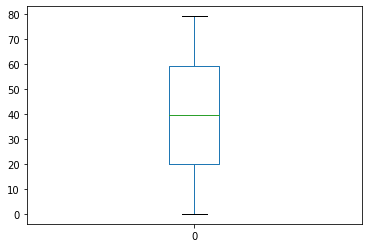

In [45]:
pd.DataFrame(range(80)).plot(kind="box")

In [ ]:
# THIS IS HOW A WAFFLE CHART IS MADE

# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})


width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')


# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})


# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')


fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()


# THEN ADJUST THE GRIDS TO MAKE THE WAFFLE CHART -THE LAST TOUCH IS THE FOLLOWING CODE-

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()


# THE FOLLOWING CODE WILL ADD LEGENDS TO THE CHART


# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

In [ ]:
# THIS IS A READY TO USE FUNCTION THAT CREATES A WAFFLE CHART


def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
# WAFFLE CHART INPUTS 

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

In [51]:
!pip install folium

In [54]:
import folium as folium 
gmap=folium.Map()
muz=folium.FeatureGroup()
muz.add_child(folium.features.CircleMarker(
    [24.4643738,46.2665911 ], radius= 5, color="red"
    ) 
)
gmap.add_child(muz)

In [57]:
world_map=folium.Map(
    zoom_start=2)